### Single Variant Linear Regression Analysis, Regression Model
Linear regression is one of the most widely used machine learning algorithms in use today. Single Variant (univariant linear regression) is simple.

In [29]:
# Usual Imports
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
# We are  going to perform single Vairant Linear Regression, using the following sample data.
x_train = np.array([1, 2]) # X is our intput variable size in 1000sq foot.
y_train = np.array([300, 500]) # Y is our output/ target variable price in £1000s

In [5]:
# It is common to us m to denote the number of training examples we have, in this case:
print(f"Training Samples (m): {x_train.shape[0]}")

Training Samples (m): 2


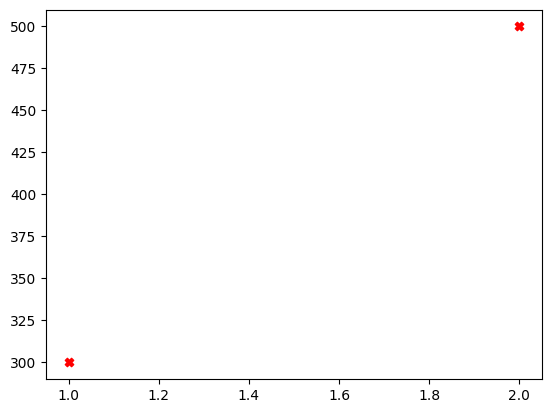

In [6]:
# Lets plot out our data onto a scatter plot
plt.scatter(x_train, y_train, marker = 'X', c = 'r')

In [20]:
# We will initalise our weight and biase to create a perfect stright line for the data
W = 200 
b = 100

In [8]:
"""
Formula for a stright line is and has always been y = W * x + b
We can write out explicit calculations for each feture in our sample data like so:
""" 
f_wb = W * x_train[0] + 100
print(f_wb) # Should be 300, representing £300,000

f_wb = W * x_train[1] + 100
print(f_wb) # Should be 500, representing £500,000 

300
500


In [21]:
"""
For a large number of sample data this can get repetitive, so we can use a for loop in a function to 
itterate over all the data and calculate this for us. This is not the final solution but it is a 
stepping stone for now.
"""

def naive_model_output(x, W, b):
    """
    Computes the output of a basic linear model, using a for loop
    
    Args:
    x - our input feature data, in this case floor area.
    w - The Weight of our model.
    b - The biase of our model.
    Returns:
    f_wb - Our outputs, in this case the estimated price of the house.
    """
    
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = W * x[i] + b
        
    return f_wb

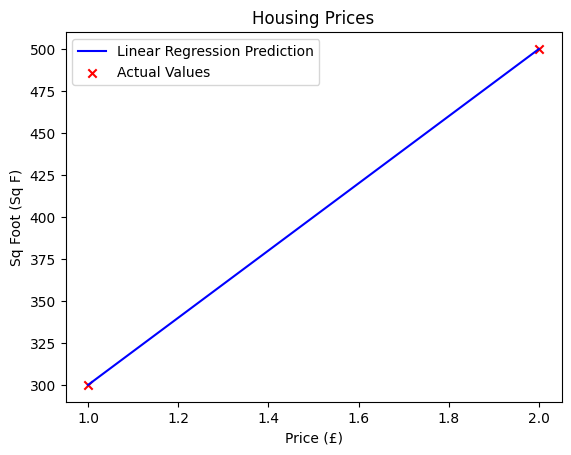

In [10]:
# Here we plot out the line using our biases and weigths mentioned before.
f_wb = naive_model_output(x_train, W, b)

plt.plot(x_train, f_wb, c='b', label='Linear Regression Prediction')
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')
plt.title("Housing Prices")
plt.xlabel("Price (£)")
plt.ylabel("Sq Foot (Sq F)")
plt.legend()

In [46]:
"""
The cost function tells us how well our model/ line fits our data. We find the error by taking how far off 
our prediction is from the target, this is also known as (the residuals). We square this value to ensure 
we dont get any negitives. Finally we sum up all the square errors over the whole dataset and divide by (m) - number of samples to find the avrage squared error. In these examples we will
dividing by (2*m) in this case. This whole operation is known as the squared error cost function.

These next few cells will look at loss and the cost function for univariant linear regression. Again
Using the same small dataset as above.
"""

x_train = np.array([1, 2])
y_train = np.array([300, 500])

In [43]:
def compute_cost(x, y, W, b):
    """
    This function will output the cost by looping over each example in our sample dataset.
    - Firstly f_wb, is calculated.
    - This then used to find the squared difference between the predicted values and the acutal y values 
    - Finally this values is added to the toatal cost.
    
    Args:
    x - Our input feature data, in this case floor area.
    w - The Weight of our model.
    b - The biase of our model.
    y - The actual y values of our dataset, the labels.
    Returns:
    cost_sum - The mean square error for a given weight and biase.
    """    
    
    m = x.shape[0]
    
    cost_sum = 0
    
    for i in range(m):
        f_wb = W * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    cost_sum = 1/(2*m) * cost_sum
    
    return cost_sum

In [23]:
"""
Testing compute cost for W, b = 50, 600 and W, b = 200, 100
"""
print("Cost for W = 50, b = 600: ")
print(compute_cost(x_train, 50, 600, y_train))

print("Cost for W = 200, b = 100: ")
print(compute_cost(x_train, 200, 100, y_train))

Cost for W = 50, b = 600: 
40625.0
Cost for W = 200, b = 100: 
0.0


In [31]:
"""
Computing the gradient of our cost function for given weights and biases. This function will be called 
every time w and b are updated.
"""

def compute_gradient(x, y, w, b):
    """
    This function computes the gradient for our single varient linear regression model.
    Args:
    x - numpy array (m, ) m examples, these are our input features.
    y - numpy array (m, ) m examples, these are our targer variables.
    w - Scalar, model parameter (weight).
    b - Scalar, model parameter (biase).
    Returns:
    dj_dw - Scaler, The gradient of the cost for the parameter w.
    dj_db - Scalar, The gradient of the cost for the parameter b.
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb - y[i]
        dj_dw /= m
        dj_db /= m
        
    return dj_dw, dj_db

In [86]:
"""

"""

def gradient_decent(x, y, w_init, b_init, num_iterations, alpha, cost_function, gradient_function):
    """
    This function combines everything  done so far an over z iterations updates w and b to reduce the cost
    function.
    Args:
    x - numpy array (m, ) m examples, these are our input features.
    y - numpy array (m, ) m examples, these are our targer variables. 
    w_init - Scalar, initial model parameter (weight).
    b_init - Scalar, initial model parameter (biase).
    num_iterations - How many times we wish the weights to update.
    alpha - By how much we want to update w and b each time.
    cost_function - The cost function.
    gradient_function- The gradient function.
    Returns:
    w - Final weight value
    b - Fianl biase value
    cost_history - A list showing the history of the cost over time.
    param_history - A list showing the history of w and b as the trainable parameters are updated.
    """
    
    w = w_init
    b = b_init
    cost_history = []
    param_history = []
    
    for i in range(num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        # Update our paramaters w and b using the gradient descent equation
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # We will save the cost and updated paramaters just so we cam ensure its all working.
        
        if i < 100000:
            cost_history.append(cost_function(x, y, w, b))
            param_history.append([w,b])
    
        if i% math.ceil(num_iterations/10) == 0:
            print(f"Iteration: {i}, Cost:{cost_history[-1]: 0.2e} ", end="")
            print(f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} ", end="")
            print(f"w: {w: 0.1f}, b: {b: 0.1f}")
            
    return w, b, cost_history, param_history

In [87]:
"""
Testing everything so far.
"""

w_init = 0
b_init = 0

iterations = 10000
alpha = 0.01
w, b, cost_history, param_history = gradient_decent(x_train, y_train, w_init, 
                                                     b_init, iterations, alpha, 
                                                     compute_cost, compute_gradient)

Iteration: 0, Cost: 8.00e+04 dj_dw: -5.750e+02, dj_db: -3.250e+02 w:  5.8, b:  3.2
Iteration: 1000, Cost: 2.22e+00 dj_dw: -1.572e-01, dj_db:  2.776e-01 w:  196.3, b:  106.6
Iteration: 2000, Cost: 9.52e-01 dj_dw: -1.030e-01, dj_db:  1.819e-01 w:  197.6, b:  104.3
Iteration: 3000, Cost: 4.09e-01 dj_dw: -6.749e-02, dj_db:  1.192e-01 w:  198.4, b:  102.8
Iteration: 4000, Cost: 1.76e-01 dj_dw: -4.422e-02, dj_db:  7.811e-02 w:  199.0, b:  101.8
Iteration: 5000, Cost: 7.54e-02 dj_dw: -2.898e-02, dj_db:  5.118e-02 w:  199.3, b:  101.2
Iteration: 6000, Cost: 3.24e-02 dj_dw: -1.899e-02, dj_db:  3.354e-02 w:  199.6, b:  100.8
Iteration: 7000, Cost: 1.39e-02 dj_dw: -1.244e-02, dj_db:  2.198e-02 w:  199.7, b:  100.5
Iteration: 8000, Cost: 5.97e-03 dj_dw: -8.153e-03, dj_db:  1.440e-02 w:  199.8, b:  100.3
Iteration: 9000, Cost: 2.56e-03 dj_dw: -5.343e-03, dj_db:  9.436e-03 w:  199.9, b:  100.2


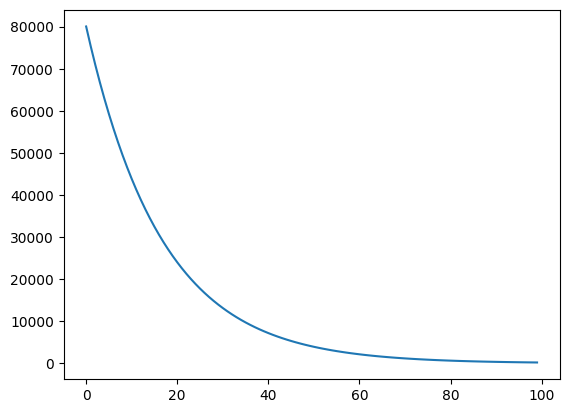

In [76]:
"""
Visulisation of cost decreasing over time, which is what we wanted.
"""
plt.plot(cost_history[:100])

In [88]:
"""
Now we have values for w and b we can use the equation of a line to predict house values given more 
floor area figures.
"""

print(f"1000 sqft house prediction: {w * 1.0 + b: 0.1f} Thousand dollars")
print(f"1200 sqft house prediction: {w * 1.2 + b: 0.1f} Thousand dollars")
print(f"2000 sqft house prediction: {w * 2.0 + b: 0.1f} Thousand dollars")

1000 sqft house prediction:  300.1 Thousand dollars
1200 sqft house prediction:  340.0 Thousand dollars
2000 sqft house prediction:  500.0 Thousand dollars
